In [311]:
import numpy as np
import pandas as pd
f=open('Soft_Magnetic_Dataset.csv','r')
data=f.read()
f.close

<function TextIOWrapper.close()>

In [312]:
def list_concat(word):
    out=''
    for i in word:
        out+=i
    return(out)

In [313]:
temp=[]
data1=[]
for t in data:
    if(t!='\n' and t!=','):
        temp.append(t)
    else:
        data1.append(temp)
        temp=[]

In [314]:
data2=[]
for i in data1:
    data2.append(list_concat(i))

In [315]:
cols=data2[0:42]
data3=data2[42:]
print(len(data3)/42)

1294.0


In [316]:
data4=np.array(data3)
data5=np.reshape(data4,(1294,42))
m,n=data5.shape
import pdb
#pdb.set_trace()

In [317]:
data_df=pd.DataFrame(data=data5,columns=cols)
data_df.head()
data_df.iloc[0,-5]==''
data_df.head()
print(data_df.columns)

Index(['Fe', 'Si', 'C', 'Al', 'B', 'P', 'Ga', 'Ge', 'Cu', 'Ag', 'Au', 'Zn',
       'Ti', 'V', 'Cr', 'Zr', 'Nb', 'Mo', 'Hf', 'Ta', 'W', 'Ce', 'Pr', 'Gd',
       'U', 'Annealing temperature (K)', 'Annealing Time (s)',
       'Primary Crystallization Onset (K)',
       'Primary Crystallization Peak (K) ',
       'Secondary Crystallization Peak (K)', ' Longitudinal Annealing field',
       ' Transverse Annealing field', 'Ribbon Thickness (um) ',
       'Coercivity (A/m)', 'Curie Temperature (K)',
       'Core Loss (kW/m^3 @ 0.2T 100kHz)',
       'Electrical Resistivity (10^-6*ohm*m)', 'Permeability @ 1kHz',
       'Magnetostriction (10^-6)', 'Magnetic Saturation (T)',
       'Grain Diameter (nm)', 'Reference DOI'],
      dtype='object')


In [318]:
#preprocessing

#remove columns with zero elements

nonzero_ratio=np.zeros(len(cols))
counter=0
for col_i in cols:
    n_zeros=0
    #print('column : ',col_i)
    #import pdb; pdb.set_trace()
    for j in range(0,len(data_df[col_i])):
        if(data_df[col_i][j]=='0' or data_df[col_i][j]==''):
            n_zeros+=1
    nonzero_ratio[counter]=1-n_zeros/len(data_df[col_i])
    counter+=1
print('non zero ratio : ',nonzero_ratio)


drop_cols=[]
for i in range(0,len(data_df.columns)-1):
    if (nonzero_ratio[i]<.05):
        #print('non zero ratio',nonzero_ratio[i])
        drop_cols.append(cols[i])
#add the last column
drop_cols.append(cols[-1])
data_df_cleancols=data_df.drop(drop_cols,axis=1)
new_cols=data_df_cleancols.columns
print(len(new_cols),len(cols))
#import pdb; pdb.set_trace()
data_df_cleancols.head()
print(data_df_cleancols.columns)

non zero ratio :  [1.00000000e+00 7.34157651e-01 3.94126739e-02 9.65996909e-02
 9.76043277e-01 1.69242658e-01 2.08655332e-02 7.34157651e-02
 7.18701700e-01 1.23647604e-02 2.55023184e-02 7.72797527e-04
 6.95517774e-03 1.93199382e-02 2.39567233e-02 1.01236476e-01
 5.83462133e-01 8.50077280e-02 7.72797527e-03 3.55486862e-02
 5.79598145e-02 2.31839258e-03 7.72797527e-04 1.54559505e-03
 6.18238022e-03 1.00000000e+00 1.00000000e+00 8.88717156e-02
 4.08809892e-01 3.50850077e-01 5.40958269e-03 7.72797527e-03
 7.94435858e-01 5.72642968e-01 7.26429675e-02 2.93663060e-02
 3.70942813e-02 2.86707883e-01 1.56105100e-01 2.27202473e-01
 1.57650696e-01 1.00000000e+00]
23 42
Index(['Fe', 'Si', 'Al', 'B', 'P', 'Ge', 'Cu', 'Zr', 'Nb', 'Mo', 'W',
       'Annealing temperature (K)', 'Annealing Time (s)',
       'Primary Crystallization Onset (K)',
       'Primary Crystallization Peak (K) ',
       'Secondary Crystallization Peak (K)', 'Ribbon Thickness (um) ',
       'Coercivity (A/m)', 'Curie Temperature (

In [319]:
drop_rows=[]
coer=data_df_cleancols['Coercivity (A/m)']
for i in range(0, len(coer)):
    if coer[i]=='':
        drop_rows.append(i)
print('Rows to be dropped',len(drop_rows))
data_df_cleanrows=data_df_cleancols.drop(drop_rows)
print('Remaining Rows',len(data_df_cleanrows))
data_df_cleanrows=data_df_cleanrows.reset_index(drop=True)
data_df_cleanrows.head()

Rows to be dropped 553
Remaining Rows 741


,Fe,Si,Al,B,P,Ge,Cu,Zr,Nb,Mo,...,Primary Crystallization Onset (K),Primary Crystallization Peak (K),Secondary Crystallization Peak (K),Ribbon Thickness (um),Coercivity (A/m),Curie Temperature (K),Permeability @ 1kHz,Magnetostriction (10^-6),Magnetic Saturation (T),Grain Diameter (nm)
0,72.5,13.5,0,9,0,1,1,0,3,0,...,,,,25,4644.936707,,,,,
1,71.5,9.5,1,9,0,5,1,0,3,0,...,,,,25,4106.876281,,,,,
2,73.5,13.5,0,9,0,0,1,0,3,0,...,,,,25,3922.927079,,,,,
3,73.5,13.5,0,9,0,0,1,0,3,0,...,,,,25,2428.806915,,,,,
4,73.5,13.5,0,7,0,2,1,0,3,0,...,,,,25,996.4925244,,,,,


In [320]:
np.random.seed(0)
for col in new_cols:
    if col != 'Coercivity (A/m)':
        for i in range(0,len(data_df_cleanrows)):
            try:
                data_df_cleanrows[col][i]=float(data_df_cleanrows[col][i])+np.random.normal(0,2,1)
            except ValueError:
                    pass
data_df_cleanrows.head()
print(data_df_cleanrows.columns)

Index(['Fe', 'Si', 'Al', 'B', 'P', 'Ge', 'Cu', 'Zr', 'Nb', 'Mo', 'W',
       'Annealing temperature (K)', 'Annealing Time (s)',
       'Primary Crystallization Onset (K)',
       'Primary Crystallization Peak (K) ',
       'Secondary Crystallization Peak (K)', 'Ribbon Thickness (um) ',
       'Coercivity (A/m)', 'Curie Temperature (K)', 'Permeability @ 1kHz',
       'Magnetostriction (10^-6)', 'Magnetic Saturation (T)',
       'Grain Diameter (nm)'],
      dtype='object')


In [321]:
m,n=data_df_cleanrows.shape
for col in new_cols:
    if col!='Coercivity (A/m)':
        for j in range(0,len(data_df_cleanrows)):
            try:
                data_df_cleanrows[col][j]=data_df_cleanrows[col][j][0]
            except ValueError:
                pass
            except IndexError:
                pass
            except TypeError:
                pass

In [322]:
m,n=data_df_cleanrows.shape
for i in range(m):
    for j in range(n):
        if (data_df_cleanrows.iloc[i][j]==''):
            data_df_cleanrows.iloc[i][j]=np.nan

In [323]:
data_df_cleanrows.head()

,Fe,Si,Al,B,P,Ge,Cu,Zr,Nb,Mo,...,Primary Crystallization Onset (K),Primary Crystallization Peak (K),Secondary Crystallization Peak (K),Ribbon Thickness (um),Coercivity (A/m),Curie Temperature (K),Permeability @ 1kHz,Magnetostriction (10^-6),Magnetic Saturation (T),Grain Diameter (nm)
0,76.0281,11.2196,-2.40747,8.15242,0.625268,1.37394,-1.11413,-2.08559,5.99051,1.37661,...,NaN,NaN,NaN,22.8576,4644.936707,NaN,NaN,NaN,NaN,NaN
1,72.3003,13.01,1.83409,7.80666,-0.386928,2.88894,-2.64939,-1.31121,2.4048,1.32479,...,NaN,NaN,NaN,26.1108,4106.876281,NaN,NaN,NaN,NaN,NaN
2,75.4575,13.234,1.37576,10.1341,2.4826,1.19122,1.48348,0.514308,1.50777,1.77779,...,NaN,NaN,NaN,21.5819,3922.927079,NaN,NaN,NaN,NaN,NaN
3,77.9818,11.9686,0.0997145,10.9765,-0.311796,-2.7506,0.709696,-0.713619,3.64489,1.08875,...,NaN,NaN,NaN,23.6256,2428.806915,NaN,NaN,NaN,NaN,NaN
4,77.2351,14.6116,2.69607,5.97219,-1.47834,3.24602,2.00399,-4.50449,0.183463,-1.45304,...,NaN,NaN,NaN,25.1247,996.4925244,NaN,NaN,NaN,NaN,NaN


In [324]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
for col in new_cols:
    if col != 'Coercivity (A/m)':
        null_values=data_df_cleanrows[col].isnull()
        data_df_cleanrows.loc[~null_values,[col]]=scaler.fit_transform(data_df_cleanrows.loc[~null_values,[col]])

In [325]:
data_df_cleanrows.head()

,Fe,Si,Al,B,P,Ge,Cu,Zr,Nb,Mo,...,Primary Crystallization Onset (K),Primary Crystallization Peak (K),Secondary Crystallization Peak (K),Ribbon Thickness (um),Coercivity (A/m),Curie Temperature (K),Permeability @ 1kHz,Magnetostriction (10^-6),Magnetic Saturation (T),Grain Diameter (nm)
0,-0.215755,0.624717,-1.17265,-0.0661397,-0.272111,0.222183,-0.913517,-0.984052,1.66608,0.534391,...,NaN,NaN,NaN,0.0261461,4644.936707,NaN,NaN,NaN,NaN,NaN
1,-0.818957,0.909259,0.680074,-0.173938,-0.550679,0.72874,-1.65492,-0.677158,0.320822,0.509423,...,NaN,NaN,NaN,0.576264,4106.876281,NaN,NaN,NaN,NaN,NaN
2,-0.30809,0.944867,0.479876,0.551689,0.23905,0.161089,0.340914,0.046319,-0.015721,0.727698,...,NaN,NaN,NaN,-0.189586,3922.927079,NaN,NaN,NaN,NaN,NaN
3,0.100374,0.743754,-0.0775066,0.814312,-0.530002,-1.15691,-0.0327589,-0.440323,0.786069,0.395685,...,NaN,NaN,NaN,0.156016,2428.806915,NaN,NaN,NaN,NaN,NaN
4,-0.0204459,1.1638,1.05659,-0.745866,-0.851049,0.848136,0.592277,-1.94269,-0.512567,-0.82906,...,NaN,NaN,NaN,0.409522,996.4925244,NaN,NaN,NaN,NaN,NaN


In [334]:
"""Obtain the features to apply PCA on"""

new_cols1=[]
cols=[]
for col in new_cols:
    cols.append(col)
#print(type(cols),cols)
new_cols1=cols[0:12]
print(new_cols1,len(new_cols1))

['Fe', 'Si', 'Al', 'B', 'P', 'Ge', 'Cu', 'Zr', 'Nb', 'Mo', 'W', 'Annealing temperature (K)'] 12


In [336]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12)
print(data_df_cleanrows[new_cols1].isnull().sum().sum())
data=data_df_cleanrows[new_cols1]
X=data[data.notna()]
pca.fit(X)
print(X.isnull().sum().sum())

0
0


In [333]:
#find number of NAN values
for i in range(0,12):
    null_values=data_df_cleanrows[new_cols[i]].isnull()
    type(null_values)
    print(len(data_df_cleanrows.loc[~null_values,[new_cols[i]]]))
print(new_cols[0:12])

741
741
741
741
741
741
741
741
741
741
741
741
Index(['Fe', 'Si', 'Al', 'B', 'P', 'Ge', 'Cu', 'Zr', 'Nb', 'Mo', 'W',
       'Annealing temperature (K)'],
      dtype='object')


0.07339656151675539

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


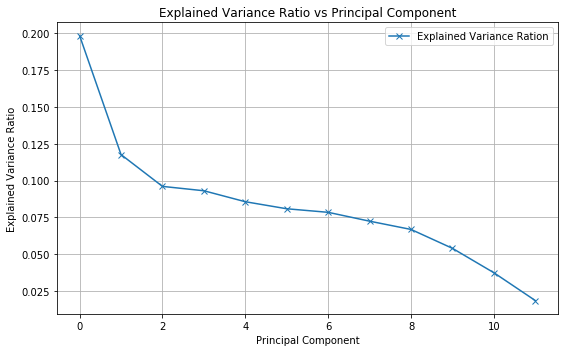

In [343]:
#plot error vs n
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(pca.explained_variance_ratio_,marker='x',label='Explained Variance Ration')
plt.hold(True)
plt.title('Explained Variance Ratio vs Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw3_3a.png')

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


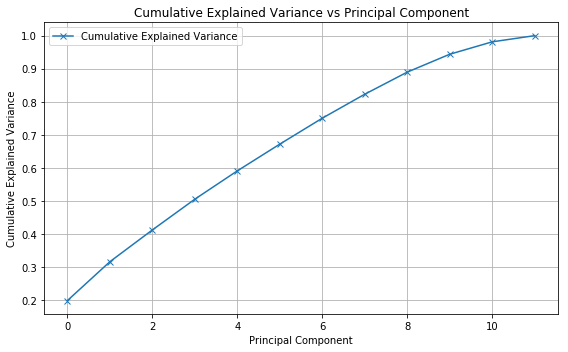

In [345]:
cum_ratio=[]
cum=0
for ratio in pca.explained_variance_ratio_:
    cum+=ratio
    cum_ratio.append(cum)
#plot error vs n
fig, ax = plt.subplots(figsize=[8,5])
plt.plot(cum_ratio,marker='x',label='Cumulative Explained Variance')
plt.hold(True)
plt.title('Cumulative Explained Variance vs Principal Component')
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Component')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw3_3b.png')

In [355]:
for i in range(0,len(data_df_cleanrows[new_cols[-6]])):
    if float(data_df_cleanrows[new_cols[-6]][i])<=2:
        data_df_cleanrows[new_cols[-6]][i]=0
    elif float(data_df_cleanrows[new_cols[-6]][i])<=8 and float(data_df_cleanrows[new_cols[-6]][i])>=2:
        data_df_cleanrows[new_cols[-6]][i]=1
    else:
        data_df_cleanrows[new_cols[-6]][i]=2
        

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibD

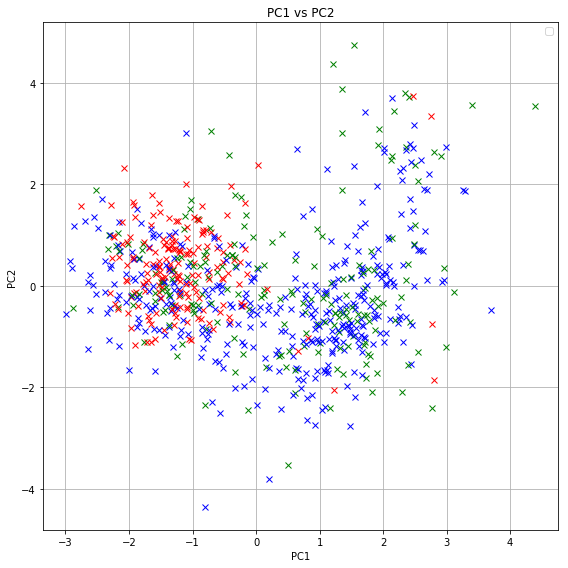

In [378]:
#plot PC against each other with Coercivity ranges
#PC1, PC2 and PC3
PC1=np.array(pca.components_[0])
PC2=np.array(pca.components_[1])
PC3=np.array(pca.components_[2])
b=np.array(X.iloc[740])
np.dot(a,b)

fig, ax = plt.subplots(figsize=[8,8])
#first PC1 and PC2
for i in range(0,len(data_df_cleanrows[new_cols[-6]])):
    pt=np.array(X.iloc[i])
    x=np.dot(pt,PC1)
    y=np.dot(pt,PC2)
    if data_df_cleanrows[new_cols[-6]][i]==0:
        plt.plot(x,y,'r',marker='x')
        plt.hold(True)
    elif data_df_cleanrows[new_cols[-6]][i]==1:
        plt.plot(x,y,'g',marker='x')
        plt.hold(True)
    else:
        plt.plot(x,y,'b',marker='x')
        plt.hold(True)
        
plt.title('PC1 vs PC2')
plt.ylabel('PC2')
plt.xlabel('PC1')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw3_4a.png')

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if sys.path[0] == '':
C:\Users\aksha\

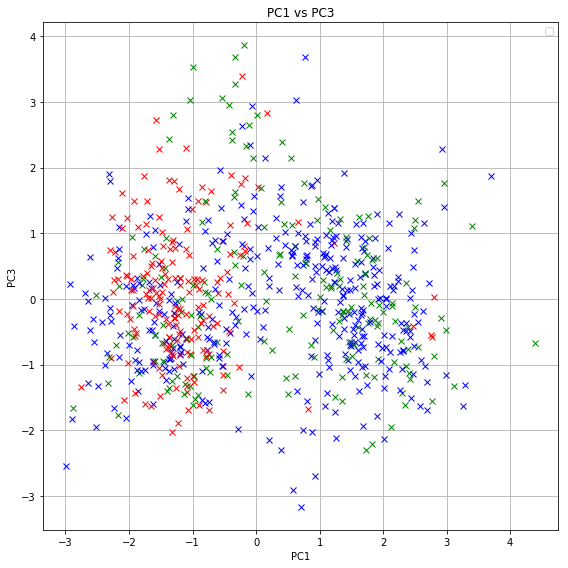

In [375]:
fig, ax = plt.subplots(figsize=[8,8])
#next PC1 and PC3
for i in range(0,len(data_df_cleanrows[new_cols[-6]])):
    pt=np.array(X.iloc[i])
    x=np.dot(pt,PC1)
    y=np.dot(pt,PC3)
    if data_df_cleanrows[new_cols[-6]][i]==0:
        plt.plot(x,y,'r',marker='x')
        plt.hold(True)
    elif data_df_cleanrows[new_cols[-6]][i]==1:
        plt.plot(x,y,'g',marker='x')
        plt.hold(True)
    else:
        plt.plot(x,y,'b',marker='x')
        plt.hold(True)
        
plt.title('PC1 vs PC3')
plt.ylabel('PC3')
plt.xlabel('PC1')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw3_4b.png')

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  from ipykernel import kernelapp as app
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)
C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if sys.path[0] == '':
C:\Users\aksha\

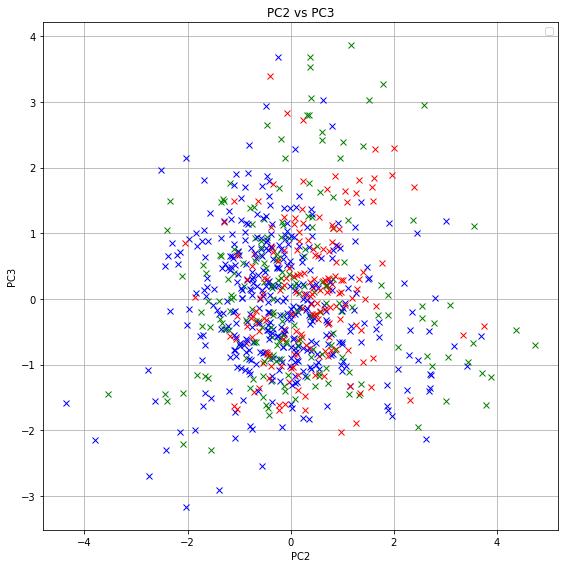

In [381]:
fig, ax = plt.subplots(figsize=[8,8])
#finally PC2 and PC23
for i in range(0,len(data_df_cleanrows[new_cols[-6]])):
    pt=np.array(X.iloc[i])
    x=np.dot(pt,PC2)
    y=np.dot(pt,PC3)
    if data_df_cleanrows[new_cols[-6]][i]==0:
        plt.plot(x,y,'r',marker='x')
        plt.hold(True)
    elif data_df_cleanrows[new_cols[-6]][i]==1:
        plt.plot(x,y,'g',marker='x')
        plt.hold(True)
    else:
        plt.plot(x,y,'b',marker='x')
        plt.hold(True)
        
plt.title('PC2 vs PC3')
plt.ylabel('PC3')
plt.xlabel('PC2')
fig.tight_layout()
ax.legend()
plt.grid(True)
plt.show
fig.savefig('hw3_4c.png')

In [380]:
print(pca.get_covariance())

[[ 1.00135135 -0.66151098 -0.14876181 -0.02993597  0.18721299 -0.14678145
  -0.03768452  0.18188581 -0.31582802 -0.09259027  0.06143245 -0.28264495]
 [-0.66151098  1.00135135  0.00627696  0.06568258 -0.4016836  -0.08846236
   0.06163139 -0.16066039  0.18883969  0.12074562 -0.11500165  0.36640789]
 [-0.14876181  0.00627696  1.00135135 -0.08189913  0.15249299 -0.0154062
  -0.00307291 -0.02590294  0.01138607 -0.05249769 -0.06988509  0.0164819 ]
 [-0.02993597  0.06568258 -0.08189913  1.00135135 -0.40090333 -0.02723041
   0.04944866 -0.10655042  0.06350481  0.0483009   0.01772845  0.01906001]
 [ 0.18721299 -0.4016836   0.15249299 -0.40090333  1.00135135 -0.055116
  -0.03769337 -0.09254025 -0.1546759  -0.05103195 -0.06564444 -0.32328742]
 [-0.14678145 -0.08846236 -0.0154062  -0.02723041 -0.055116    1.00135135
   0.03965982 -0.01132244  0.11318762 -0.00814852 -0.07006339 -0.05778079]
 [-0.03768452  0.06163139 -0.00307291  0.04944866 -0.03769337  0.03965982
   1.00135135  0.00407828  0.004152

In [387]:
"""The loading matrix W, we have the PCs in the columns and the original variables in the rows"""
comp_mat=pca.components_

df_components=pd.DataFrame(np.transpose(comp_mat),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
df_components

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
0,0.495333,-0.332875,0.010266,0.009189,-0.055634,-0.016890,-0.052244,0.020629,0.191008,-0.364859,-0.379433,0.568805
1,-0.533270,0.111963,-0.156031,-0.050673,-0.174002,0.076273,-0.155193,-0.162216,-0.237466,0.243980,-0.097995,0.681293
2,-0.006857,0.461403,-0.177270,0.096178,-0.248446,-0.319845,0.234003,0.692446,0.008677,-0.053177,-0.201126,0.069030
3,-0.185512,-0.468177,0.333770,-0.275425,-0.210867,-0.407294,0.046601,0.280567,0.085261,0.012919,0.487182,0.152017
4,0.396329,0.477389,-0.109116,-0.157813,0.045252,0.099786,0.081968,-0.135396,0.165318,0.003406,0.636431,0.329803
5,-0.043539,0.158239,0.627001,0.211257,0.471186,0.127733,0.159545,0.177553,-0.402384,-0.179897,0.027607,0.212028
6,-0.061899,-0.012510,0.302562,0.089112,-0.575218,0.532712,0.498176,-0.063445,0.167828,0.003922,-0.028689,-0.025683
7,0.131639,-0.231033,-0.099144,0.696356,-0.035059,0.220873,-0.294988,0.315756,0.062744,0.345906,0.260491,0.079861
8,-0.306006,0.141902,0.197357,0.171336,0.325309,-0.148213,0.065714,-0.093367,0.796974,0.120510,-0.129115,0.103576
9,-0.125895,-0.048304,-0.077698,-0.492704,0.220865,0.580332,-0.248261,0.498848,0.185489,-0.038191,-0.028542,-0.017158


In [392]:
"""Most important feature"""
#if we look at PC1 then we can decide that feature 1 is the most important feature
new_cols1[0:2]

['Fe', 'Si']

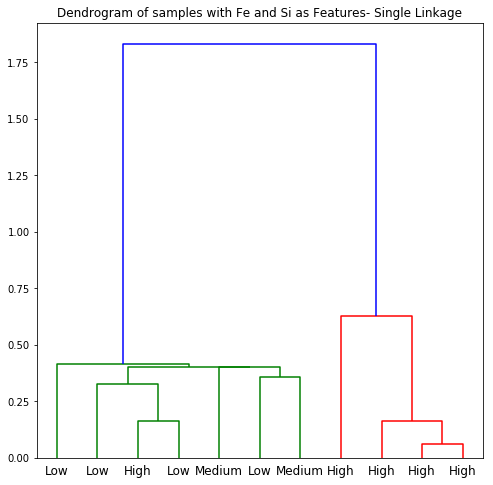

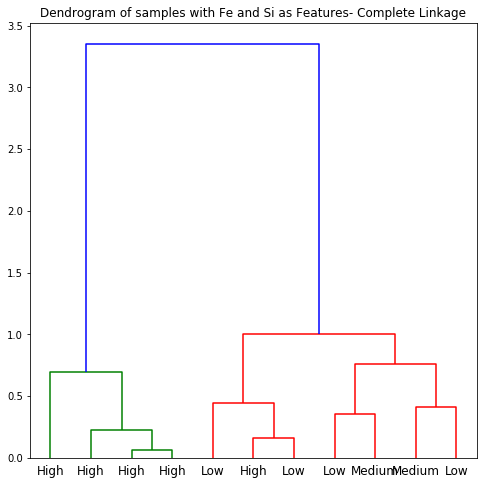

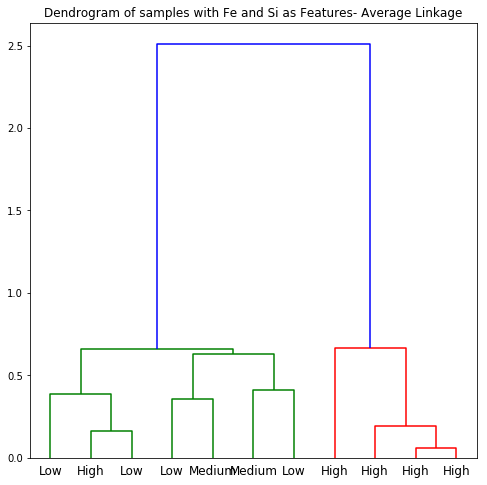

In [405]:
"""Hierarchical Clustering"""
from scipy.cluster.hierarchy import dendrogram, linkage
X1=data_df_cleanrows[new_cols1[0:2]]
m,n=X1.shape
X=[]
labels1=[]
for i in range (0,132,12):
    X.append(X1.iloc[i])
    if data_df_cleanrows['Coercivity (A/m)'][i]==0:
        labels1.append('Low')
    elif data_df_cleanrows['Coercivity (A/m)'][i]==1:
        labels1.append('Medium')
    else:
        labels1.append('High')
        
#single linkage        
#import pdb;pdb.set_trace()
Z=linkage(X,'single')
fig, ax = plt.subplots(figsize=[8,8])
dendrogram(Z,labels=labels1)
plt.title('Dendrogram of samples with Fe and Si as Features- Single Linkage')
plt.show()
fig.savefig('hw3_6a.png')

#complete
Z=linkage(X,'complete')
fig, ax = plt.subplots(figsize=[8,8])
dendrogram(Z,labels=labels1)
plt.title('Dendrogram of samples with Fe and Si as Features- Complete Linkage')
plt.show()
fig.savefig('hw3_6b.png')

#average linkage
Z=linkage(X,'average')
fig, ax = plt.subplots(figsize=[8,8])
dendrogram(Z,labels=labels1)
plt.title('Dendrogram of samples with Fe and Si as Features- Average Linkage')
plt.show()
fig.savefig('hw3_6c.png')